<a href="https://colab.research.google.com/github/mdclary/PyCaret/blob/main/Adv_Stat_Final_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 5.6MB/s 
     |████████████████████████████████| 174kB 16.7MB/s 
     |████████████████████████████████| 66.3MB 54kB/s 
     |████████████████████████████████| 6.8MB 43.2MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 1.6MB 44.6MB/s 
     |████████████████████████████████| 276kB 40.1MB/s 
     |████████████████████████████████| 1.8MB 44.0MB/s 
     |████████████████████████████████| 266kB 49.6MB/s 
     |████████████████████████████████| 13.9MB 331kB/s 
     |████████████████████████████████| 148.9MB 79kB/s 
     |████████████████████████████████| 2.1MB 21.1MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     |████████████████████████████████| 604kB 42.7MB/s 
     |████████████████████████████████| 3.1MB 43.1MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 163kB 45.8MB/s 


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171

In [ ]:
dataset.describe()

Carat Weight          Price
count   6000.000000    6000.000000
mean       1.334520   11791.579333
std        0.475696   10184.350051
min        0.750000    2184.000000
25%        1.000000    5150.500000
50%        1.130000    7857.000000
75%        1.590000   15036.500000
max        2.910000  101561.000000

In [ ]:
dataset.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

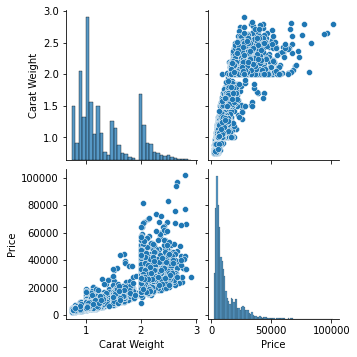

In [ ]:
sns.pairplot(dataset)

In [ ]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [ ]:
#add if regression needs to fill blanks
#df=df.replace(['(null)','empty'])

In [ ]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [ ]:
from pycaret.regression import *

In [ ]:
exp_reg101 = setup(data = data, target = 'Price', session_id=123)  

Description             Value
0                               session_id               123
1                                   Target             Price
2                            Original Data         (5400, 8)
3                           Missing Values             False
4                         Numeric Features                 1
5                     Categorical Features                 6
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (3779, 28)
10                    Transformed Test Set        (1621, 28)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              b810
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42                              Clustering             False
43                    Clustering Iteration              None
44                     Polynomial Features             False
45                       Polynomial Degree              None
46                    Trignometry Features             False
47                    Polynomial Threshold              None
48                          Group Features             False
49                       Feature Selection             False
50            Features Selection Threshold              None
51                     Feature Interaction             False
52                           Feature Ratio             False
53                   Interaction Threshold              None
54                        Transform Target             False
55                 Transform Target Method           box-cox

In [ ]:
#will do a linear regression however, catboost regressor is proving to have a better predictor based on the model comparison
compare_models()

Model         MAE           MSE  \
catboost               CatBoost Regressor    630.8795  2.082271e+06   
et                  Extra Trees Regressor    762.0118  2.763999e+06   
xgboost         Extreme Gradient Boosting    708.8427  2.799609e+06   
rf                Random Forest Regressor    760.6304  2.929683e+06   
lightgbm  Light Gradient Boosting Machine    752.6446  3.056348e+06   
gbr           Gradient Boosting Regressor    920.0795  3.763129e+06   
dt                Decision Tree Regressor   1003.1237  5.305620e+06   
ridge                    Ridge Regression   2413.5700  1.412050e+07   
lasso                    Lasso Regression   2412.1923  1.424680e+07   
llar         Lasso Least Angle Regression   2355.6153  1.427202e+07   
br                         Bayesian Ridge   2415.8031  1.427077e+07   
lr                      Linear Regression   2418.7037  1.427937e+07   
huber                     Huber Regressor   1936.1465  1.859924e+07   
par          Passive Aggressive Regressor   1944.1634  1.995567e+07   
omp           Orthogonal Matching Pursuit   2792.7313  2.372865e+07   
ada                    AdaBoost Regressor   4232.2217  2.520142e+07   
knn                 K Neighbors Regressor   2968.0751  2.962791e+07   
en                            Elastic Net   5029.5912  5.639980e+07   
lar                Least Angle Regression  13021.6002  2.509748e+09   

                RMSE       R2   RMSLE    MAPE  TT (Sec)  
catboost   1373.9172   0.9804  0.0672  0.0492     1.294  
et         1612.2410   0.9729  0.0817  0.0607     1.296  
xgboost    1607.9791   0.9724  0.0743  0.0541     0.915  
rf         1663.0148   0.9714  0.0818  0.0597     1.200  
lightgbm   1687.9907   0.9711  0.0773  0.0567     0.077  
gbr        1900.8431   0.9633  0.1024  0.0770     0.252  
dt         2228.7271   0.9476  0.1083  0.0775     0.027  
ridge      3726.1655   0.8621  0.6689  0.2875     0.015  
lasso      3744.2305   0.8608  0.6767  0.2866     0.037  
llar       3745.3097   0.8607  0.6391  0.2728     0.018  
br         3746.9951   0.8606  0.6696  0.2873     0.021  
lr         3748.9580   0.8604  0.6690  0.2879     0.290  
huber      4252.8771   0.8209  0.4333  0.1657     0.127  
par        4400.2133   0.8083  0.4317  0.1594     0.052  
omp        4829.3171   0.7678  0.5819  0.2654     0.015  
ada        5012.4175   0.7467  0.5102  0.5970     0.218  
knn        5421.7240   0.7051  0.3664  0.2730     0.074  
en         7467.6598   0.4472  0.5369  0.5845     0.017  
lar       19328.0963 -30.2636  0.8512  1.8794     0.020

In [ ]:
lr = create_model('lr')

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     2381.9102  1.226271e+07  3501.8152  0.8654  0.4695  0.2593
1     2596.1006  2.321779e+07  4818.4844  0.8221  0.7841  0.2915
2     2440.1509  1.614320e+07  4017.8599  0.8519  0.6548  0.2965
3     2332.3123  1.076285e+07  3280.6780  0.8813  0.6797  0.2744
4     2455.7566  1.018464e+07  3191.3391  0.8730  0.6316  0.3353
5     2495.1772  1.725298e+07  4153.6709  0.8528  0.5594  0.2908
6     2279.1560  1.270736e+07  3564.7388  0.8806  0.6651  0.2645
7     2382.6431  1.146744e+07  3386.3604  0.8550  0.6893  0.2931
8     2380.5115  1.264378e+07  3555.8088  0.8758  0.7549  0.2742
9     2443.3184  1.615095e+07  4018.8245  0.8462  0.8015  0.2992
Mean  2418.7037  1.427937e+07  3748.9580  0.8604  0.6690  0.2879
SD      84.1466  3.767856e+06   474.0085  0.0176  0.0960  0.0206

In [ ]:
print (lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [ ]:
tuned_lr = tune_model(lr)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     2380.1072  1.225749e+07  3501.0696  0.8654  0.4712  0.2593
1     2600.1909  2.332671e+07  4829.7734  0.8212  0.5635  0.2916
2     2438.9680  1.613706e+07  4017.0959  0.8520  0.6569  0.2963
3     2327.7229  1.069617e+07  3270.5002  0.8820  0.7797  0.2744
4     2455.6426  1.018458e+07  3191.3281  0.8730  0.6320  0.3353
5     2455.1997  1.682505e+07  4101.8350  0.8564  0.6213  0.2840
6     2277.6663  1.271790e+07  3566.2158  0.8805  0.6736  0.2640
7     2382.6409  1.146744e+07  3386.3604  0.8550  0.6893  0.2931
8     2380.5103  1.264378e+07  3555.8086  0.8758  0.7549  0.2742
9     2445.7600  1.618504e+07  4023.0635  0.8459  0.8371  0.2989
Mean  2414.4409  1.424412e+07  3744.3051  0.8607  0.6680  0.2871
SD      83.0741  3.769881e+06   473.6032  0.0178  0.1012  0.0206

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


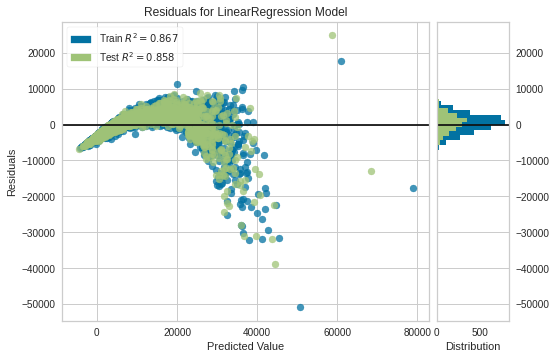

In [ ]:
plot_model(tuned_lr)

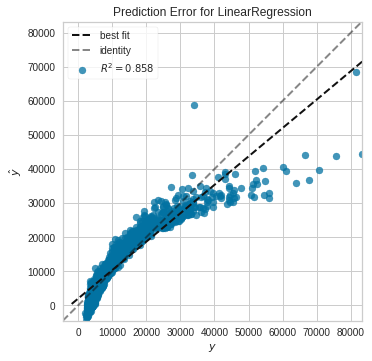

In [ ]:
plot_model(tuned_lr, plot = 'error')

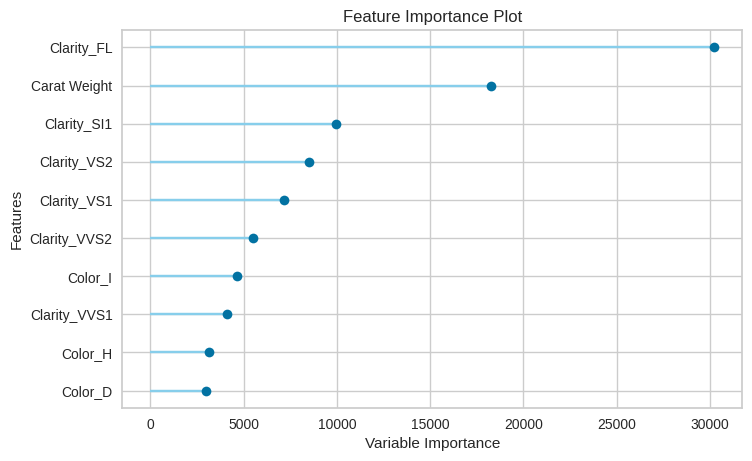

In [ ]:
plot_model(tuned_lr, plot='feature')

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lr)

Model          MAE         MSE  ...      R2   RMSLE    MAPE
0  Linear Regression  2470.010254  15517562.0  ...  0.8585  0.5879  0.2734

[1 rows x 7 columns]

Carat Weight  Cut_Fair  Cut_Good  ...  Report_GIA    Price         Label
0             1.16       0.0       0.0  ...         1.0   7059.0   9202.017578
1             1.14       0.0       0.0  ...         1.0   5809.0   6136.803711
2             1.25       0.0       0.0  ...         1.0  10641.0  17269.070312
3             0.79       0.0       0.0  ...         1.0   2871.0   -154.722656
4             2.23       0.0       0.0  ...         1.0  21706.0  25344.300781
...            ...       ...       ...  ...         ...      ...           ...
1616          1.22       0.0       0.0  ...         1.0  12906.0  15243.134766
1617          0.83       0.0       0.0  ...         1.0   3235.0   3073.290283
1618          1.51       0.0       0.0  ...         1.0   9058.0  10661.516602
1619          1.16       0.0       0.0  ...         1.0   5091.0   3361.516602
1620          2.06       0.0       0.0  ...         0.0  25354.0  30316.890625

[1621 rows x 30 columns]

In [ ]:
#now will evaluate using catboost
catboost = create_model('catboost')

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     522.1320  6.999052e+05   836.6034  0.9923  0.0670  0.0479
1     731.0635  4.447250e+06  2108.8503  0.9659  0.0652  0.0482
2     664.1178  1.670243e+06  1292.3787  0.9847  0.0693  0.0521
3     548.9799  8.118312e+05   901.0167  0.9910  0.0585  0.0453
4     585.8118  1.412274e+06  1188.3914  0.9824  0.0679  0.0480
5     689.6413  4.922421e+06  2218.6530  0.9580  0.0690  0.0491
6     647.4816  1.790748e+06  1338.1883  0.9832  0.0679  0.0496
7     636.0041  1.589003e+06  1260.5566  0.9799  0.0670  0.0502
8     587.1486  1.122175e+06  1059.3275  0.9890  0.0619  0.0474
9     696.4141  2.356857e+06  1535.2057  0.9776  0.0786  0.0542
Mean  630.8795  2.082271e+06  1373.9172  0.9804  0.0672  0.0492
SD     64.5510  1.383065e+06   441.1601  0.0104  0.0050  0.0024

In [ ]:
print(catboost)

In [ ]:
tuned_catboost = tune_model(catboost)

MAE           MSE       RMSE      R2   RMSLE    MAPE
0     1044.4416  3.287702e+06  1813.2021  0.9639  0.1335  0.1013
1     1218.6921  1.316110e+07  3627.8231  0.8991  0.1396  0.1028
2     1139.1048  5.615852e+06  2369.7789  0.9485  0.1429  0.1114
3      957.1337  2.779588e+06  1667.2098  0.9693  0.1238  0.0940
4      898.6778  1.886506e+06  1373.5014  0.9765  0.1337  0.1015
5     1229.7487  9.810488e+06  3132.1699  0.9163  0.1404  0.1083
6     1124.8123  5.863060e+06  2421.3757  0.9449  0.1500  0.1105
7     1064.9233  3.910843e+06  1977.5852  0.9505  0.1446  0.1101
8     1109.8291  4.544738e+06  2131.8391  0.9554  0.1349  0.1012
9     1149.4256  5.715170e+06  2390.6422  0.9456  0.1511  0.1144
Mean  1093.6789  5.657505e+06  2290.5127  0.9470  0.1395  0.1056
SD     100.2326  3.255863e+06   641.1367  0.0223  0.0079  0.0060

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_catboost)

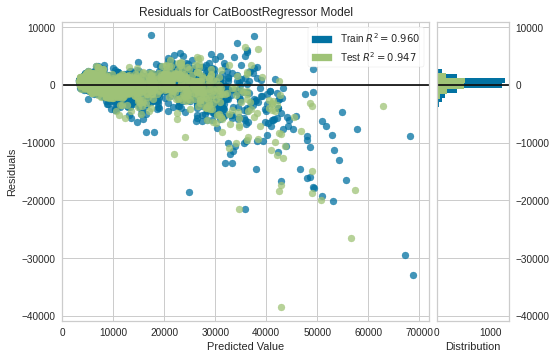

In [ ]:
plot_model(tuned_catboost)

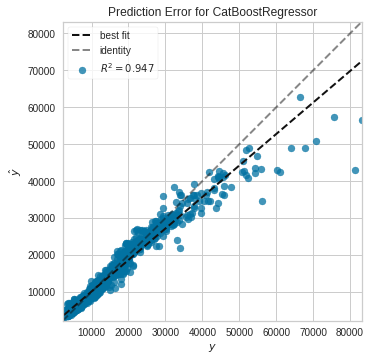

In [ ]:
plot_model(tuned_catboost, plot = 'error')

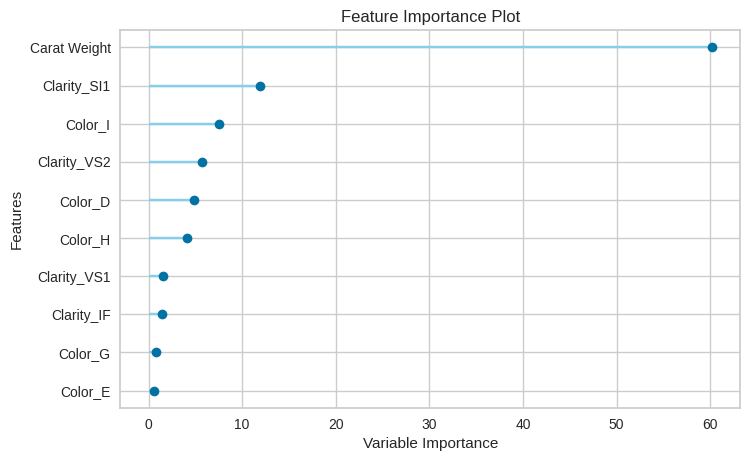

In [ ]:
plot_model(tuned_catboost, plot='feature')

In [ ]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pip install shap

     |████████████████████████████████| 327kB 3.9MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463916 sha256=083bbb83141b34d8786ff375289a13f99131caa35c6ca43c2265ca7b5db0d521
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


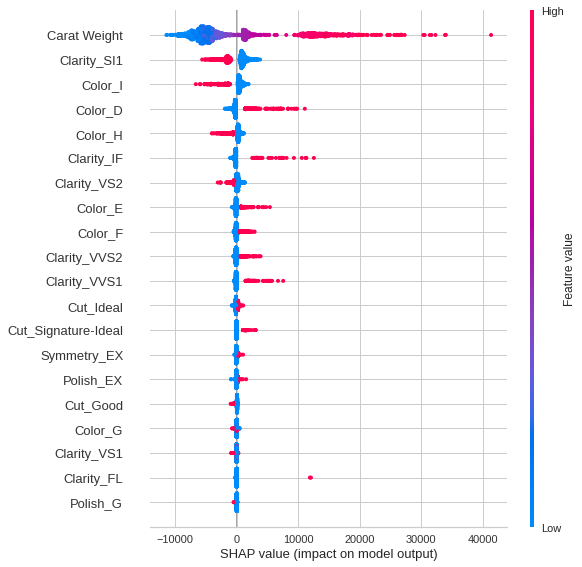

In [ ]:
interpret_model(catboost)

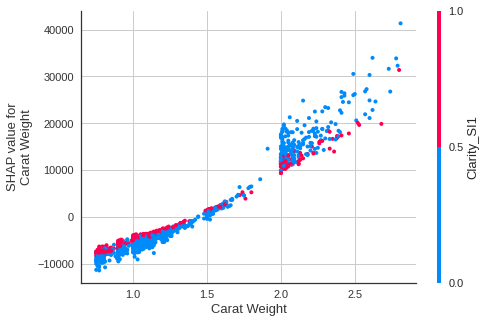

In [ ]:
interpret_model(catboost, plot = 'correlation')

In [ ]:
interpret_model(catboost, plot = 'reason', observation = 0) 

In [ ]:
final_catboost = finalize_model(tuned_catboost)

In [ ]:
#Final Cat Boost Machine parameters for deployment
print(final_catboost)

In [ ]:
predict_model(final_catboost)

Model        MAE           MSE  ...      R2   RMSLE    MAPE
0  CatBoost Regressor  1006.2845  3.968595e+06  ...  0.9638  0.1215  0.0932

[1 rows x 7 columns]

Carat Weight  Cut_Fair  Cut_Good  ...  Report_GIA    Price         Label
0             1.16       0.0       0.0  ...         1.0   7059.0   6965.272138
1             1.14       0.0       0.0  ...         1.0   5809.0   6378.553133
2             1.25       0.0       0.0  ...         1.0  10641.0  11658.227146
3             0.79       0.0       0.0  ...         1.0   2871.0   3487.188410
4             2.23       0.0       0.0  ...         1.0  21706.0  23911.071628
...            ...       ...       ...  ...         ...      ...           ...
1616          1.22       0.0       0.0  ...         1.0  12906.0  10870.240339
1617          0.83       0.0       0.0  ...         1.0   3235.0   3779.732768
1618          1.51       0.0       0.0  ...         1.0   9058.0   9351.319830
1619          1.16       0.0       0.0  ...         1.0   5091.0   5411.838909
1620          2.06       0.0       0.0  ...         0.0  25354.0  24873.634467

[1621 rows x 30 columns]

In [ ]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

Carat Weight        Cut Color Clarity  ... Symmetry Report  Price         Label
0          1.21      Ideal     G    VVS1  ...       EX    GIA  11572  10087.392197
1          2.00      Ideal     I     SI1  ...       VG    GIA  16775  15518.324852
2          1.51       Good     F     SI1  ...        G    GIA  10429  11093.821820
3          0.90      Ideal     F     SI1  ...       EX    GIA   4523   4308.251297
4          1.01  Very Good     I     SI1  ...       VG    GIA   4375   4472.159416

[5 rows x 9 columns]

In [ ]:
save_model(final_catboost,'Final Catboost Model Adv STAT Final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Price')),
                 ('fix_perfect', Remove_100(target='Price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('

In [ ]:
#When I am ready to load model again and apply new data
#new_prediction = predict_model(saved_final_catboost, data=data_unseen)

In [ ]:
#new_prediction.head()

In [ ]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

NameError: ignored